## Sampling strategies

#### Reference

[An Introduction to Statistical Computing: A Simulation-based Approach, Jochen Voss](https://www.wiley.com/en-us/An+Introduction+to+Statistical+Computing%3A+A+Simulation+based+Approach-p-9781118357729)

We want to look at ways to sample from a distribution. 
In most practical scenarios, the distributions are complex enough that it is difficult enough to sample from appropriately but they can often be evaluated at a certain point. The simple strategy of sampling uniformly fails for a couple of reasons. 

1. This quickly becomes inefficient as the number of dimensions grow.

2. In high-dimensional spaces, there are vast regions of nothingness and most of the probability density is concentrated in a small region. Ideally, we want to sample from regions in space where the function f(x) and the probability of that value f(x) given by p(x) is high so that the contribution of this term \\(f(x) p(x)\\) is high.

We will look at various ways to perform efficient sampling here. This is useful not only to understand how distributions are sampled in practice in a package such as SciPy but it also helps you to write your own custom distribution should that need arise.

### Sampling from Discrete Distributions

#### Uniform Continuous to Uniform Discrete

In order to sample data from a particular distribution we can start with a uniform continuous distribution between 0 and 1 denoted as U[0,1]. The probability of picking a value less than 'a' that is between 0 and 1 is given by 

$$P(x < a) = a$$

but because there are infinite possibilities between 0 and 1, the probability of picking any particular value 'a' is close to 0.

If we have a discrete uniform distribution from 0 to 'n' denoted as U{0,1,...n-1}, this set has 'n' samples and the probability of choosing any discrete value 'a' is 

$$P(x = a) = \dfrac{1}{n}$$

since this is a discrete value and there are a finite number of elements in this set. One way to convert this continuous uniform distribution U[0,1] to the discrete distribution U{0,1,...n-1} is through the transformation X = [[n U]] where I have used the notation [[ ]] for rounding the values within to the nearest integer. Now

$X \sim U \{0,1,...n-1\}$

#### Arbitrary Discrete Distributions

To generate an arbitrary distribution, we can use the continuous uniform distribution and sample from it followed by a transform such that we get our desired distribution. In the figure below, we have divided the uniform continuous distribution U[0,1] into uneven lengths given by \\(p_1, p_2, p_3...p_n\\) (here n = 5) such that \\(\sum p_i = 1\\)

![Interval Transformation](transformation.png)

If we want to sample from a arbitrary discrete set \\(A = \{a_1, a_2...a_n\}\\), with probabilities given by \\(p_1, p_2, p_3...p_n\\) all we have to do is sample from the uniform continuous distribution U[0,1] since the interval \\(i\\) will be picked with probability \\(p_i\\) corresponding to the set element \\(a_i\\).


### The Inverse Transform Method

This method uses the Cumulative Distribution Function (CDF) and the inverse of the CDF to generate our desired distribution.

If a variable 'Y' is generated by applying a function 'F' to 'X' we get

$$Y = F(X)$$

which implies that we can apply an inverse transformation to 'Y', if it exists, to obtain 'X'. Here the function has to be invertible. The function 'F' is said to be bijective and has no jumps in its behavior. 

$$F^{-1} (Y) = X$$

The steps required to sample from the distribution with CDF given by 'F' is shown below

1. Calculate the inverse of the CDF given by \\(F^{-1}\\)

2. Sample from U[0,1]

3. Use the sampled values from (2) as input to the inverse of the CDF $F^{-1}$ such that 

    $$X \sim F^{-1} (U)$$
    
    
#### Example

An exponential distribution is given by the PDF

$$f(x) = \lambda e^{-\lambda x}$$ 

if x >= 0

The CDF for this function is 

$$F(a) = 1 - e^{-\lambda a}$$

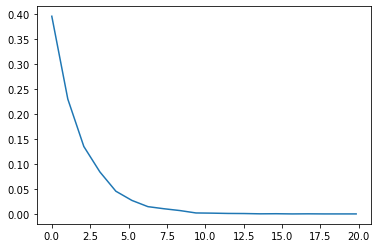

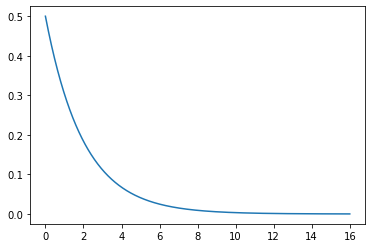

In [38]:
import numpy as np
from scipy.stats import expon
from matplotlib import pyplot as plt

# Generate random numbers
U = np.random.rand(5000)
lam = 0.5
X = -np.log(1 - U)/lam #transformations
hist, bin_edges = np.histogram(X, bins=20, density=True) #histogram of the transformed variables
plt.plot(bin_edges[0:-1], hist) #ideally should center the hist values to be the average of bin edges

# Get analytical PDF
plt.figure()
x = np.linspace(0, 16, 1000)
Y = expon.pdf(x,0,1/lam)
plt.plot(x, Y)

### UNGRADED EVALUATION (30mins)

Generate a Rayleigh distribution using the Inverse Transform Method

#### ADD DESCRIPTION OF THE RAYLEIGH DISTRIBUTION HERE

### GRADED EVALUTION (10 mins)

### Rejection Sampling

Rejection sampling is more sophisticated than the techniques listed above. It generates approximately the correct distribution and rejection sampling is used to correct the errors resulting in the correct distribution. Rejection sampling is based on the following principles. Suppose that we want to sample from a distribution p(z).

1. A probability density called the proposal density 'q(z)'. This density is selected such that it is easier to sample than the original distribution p(z).

2. p(z) is difficult to sample from but we can evaluate it up to a certain proportionality constant.

3. A constant 'k' such that \\(k q(z) >= p(z)\\) for all values of z. This forms an envelope around p(z).

![Sampling](images/sampling_distribution.png)

Given the above densities, we use the following steps 

1. Draw \\(z_0\\) from \\(q(z)\\) and compute \\(k q(z_0)\\)

2. Draw a uniform number \\(u_0\\) from \\([0, k q(z_0)]\\)

3. If \\(u_0 > p(z_0)\\), the sample is rejected otherwise save \\(u_0\\). By doing so, anything that falls under \\(p(z)\\) is saved and has a uniform distribution thereby obtaining the distribution of p(z) 
       
4. Continue with (1) until sufficient samples have been drawn

The samples are accepted with probability \\(\dfrac{p(z)}{k q(z)}\\).

### Importance Sampling

Importance sampling is useful for computing terms such as the expectations of a function \\(f(x)\\) with distribution \\(p(x)\\). Ideally, we want to sample in space where the product \\(f(x) p(x)\\) is high since the expected value is computed as

$$E[f] = \sum_i p(x_i) f(x_i)$$

Importance sampling is also based on the idea of using another proposal distribution that is easier to sample from compared to the original distribution p(x).

$$E[f] = \int p(x) f(x) dx = \int \dfrac{p(x)}{q(x)} q(x) f(x) dx = \dfrac{1}{L} \sum_l \dfrac{p(x)}{q(x)} f(x) $$ where samples are drawn from (q(x))

The \\(\dfrac{p(x)}{q(x)}\\) is known as the importance weights and correct the bias resulting from sampling from the wrong distribution. Unlike rejection sampling, all samples are retained.
      

### GRADED EVALUATION (12 mins)